In [31]:
import json
import random

def generate_alchemic_compounds(num_compounds, num_properties):
    compounds = []
    states = ["solid", "liquid", "gas"]
    colors = ["red", "orange", "yellow", "green", "blue", "indigo", "violet"]
    
    for i in range(num_compounds):
        state = random.choice(states)
        color = random.choice(colors)
        property_id = random.randint(0, num_properties - 1)
        value = random.randint(1, 10)
        compound = {'id': i, 'state': state, 'color': color, 'property_id': property_id, 'value': value}
        compounds.append(compound)

    with open("compounds.json", "w") as outfile:
        json.dump(compounds, outfile)
    
    return compounds

def generate_alchemical_minerals(num_minerals, compounds_data):
    minerals = []
    structures = ["cubic crystal", "tetragonal crystal", "hexagonal crystal", "rhombohedral crystal", "orthorhombic crystal", "monoclinic crystal", "triclinic crystal"]

    for i in range(num_minerals):
        num_compounds_in_mineral = random.randint(1, 5)
        compounds = tuple(random.sample(compounds_data, num_compounds_in_mineral))
        total_value = sum(compound['value'] for compound in compounds)
        frequency = 10 - (total_value // num_compounds_in_mineral)
        color = random.choice(["red", "orange", "yellow", "green", "blue", "indigo", "violet"])
        structure = random.choice(structures)
        mineral = {'id': i, 'compounds': [c['id'] for c in compounds], 'frequency': frequency, 'color': color, 'structure': structure}
        minerals.append(mineral)

    with open("minerals.json", "w") as outfile:
        json.dump(minerals, outfile)
    return minerals

def generate_alchemic_reactions(num_reactions, num_compounds, num_conditions):
    reactions = []

    for i in range(num_reactions):
        num_precursors = random.choices([1, 2, 3, 4, 5], weights=[5, 40, 25, 20, 10], k=1)[0]
        num_products = random.choices([1, 2, 3], weights=[70, 20, 10], k=1)[0]
        num_requirements = random.choices([1, 2, 3, 4, 5], weights=[20, 45, 20, 10, 5], k=1)[0]
        precursors = tuple(random.sample(range(num_compounds), num_precursors))
        conditions = tuple(random.sample(range(num_conditions), num_requirements))
        products = tuple(random.sample(range(num_compounds), num_products))
        reaction = {'precursors': precursors, 'conditions': conditions, 'products': products}
        reactions.append(reaction)

    with open("reactions.json", "w") as outfile:
        json.dump(reactions, outfile)

    return reactions

import json

def write_alchemy_encyclopedia(compounds_file, minerals_file, magical_properties_file, reaction_conditions_file, reactions_file, output_file):
    with open(compounds_file, "r") as infile:
        compounds_data = json.load(infile)
    
    with open(minerals_file, "r") as infile:
        minerals_data = json.load(infile)

    with open(magical_properties_file, "r") as infile:
        magical_properties_data = json.load(infile)

    with open(reaction_conditions_file, "r") as infile:
        reaction_conditions_data = json.load(infile)
    
    with open(reactions_file, 'r') as infile:
        reactions_data = json.load(infile)
    
    with open(output_file, "w") as outfile:
        outfile.write("=== Alchemy Encyclopedia ===\n\n")
        outfile.write("A whimsical guide to the mystical world of alchemy.\n\n")

        outfile.write("\n--- Compounds ---\n\n")
        for compound in compounds_data:
            magical_property = magical_properties_data[compound['property_id']]
            outfile.write(f"Compound {compound['id']}: {compound['color'].capitalize()} {compound['state']}\n")
            outfile.write(f" Magical Properties: {', '.join(magical_property['effects'])} {', '.join(magical_property['conditions'])}\n")
            outfile.write(f" Value: {compound['value']}\n\n")
        
        outfile.write("\n--- Minerals ---\n\n")
        for mineral in minerals_data:
            compound_ids = mineral['compounds']
            outfile.write(f"Mineral {mineral['id']}: {mineral['color'].capitalize()} {mineral['structure']}\n")
            outfile.write(f" Compounds: {', '.join(f'Compound {compound_id}' for compound_id in compound_ids)}\n")
            outfile.write(f" Frequency: {mineral['frequency']}\n\n")

        outfile.write("\n--- Reactions ---\n\n")

        for reaction in reactions_data:
            print(reaction)
            precursors = ', '.join(f"Compound {compound_id}" for compound_id in reaction['precursors'])
            products = ', '.join(f"Compound {compound_id}" for compound_id in reaction['products'])
            conditions = ', '.join(reaction_conditions_data[cond_id]['description'] for cond_id in reaction['conditions'])
            outfile.write(f"Reaction: {precursors} -> {products}\n")
            outfile.write(f" Conditions: {conditions}\n\n")




In [19]:
compounds = generate_alchemic_compounds(20, 10)
reactions = generate_alchemic_reactions(30, 20, 10)
minerals = generate_alchemical_minerals(15, compounds)

In [20]:
reactions

[{'precursors': (9, 15, 10), 'conditions': (8, 2), 'products': (0,)},
 {'precursors': (9, 12, 13), 'conditions': (0, 4), 'products': (2,)},
 {'precursors': (17, 16, 15, 13), 'conditions': (8, 6, 0), 'products': (8,)},
 {'precursors': (3, 15), 'conditions': (2, 6, 1), 'products': (13,)},
 {'precursors': (9, 16, 7, 12, 19),
  'conditions': (9, 3, 1),
  'products': (17, 4, 2)},
 {'precursors': (17, 6, 7), 'conditions': (2, 0, 5), 'products': (2, 9)},
 {'precursors': (4, 7, 11), 'conditions': (9, 6), 'products': (1, 9)},
 {'precursors': (3, 18), 'conditions': (3, 4), 'products': (8,)},
 {'precursors': (16, 18), 'conditions': (3, 6), 'products': (13, 19)},
 {'precursors': (2, 15), 'conditions': (9, 6), 'products': (11,)},
 {'precursors': (13, 11, 2, 9, 15), 'conditions': (8, 7, 0), 'products': (3,)},
 {'precursors': (13, 4, 17), 'conditions': (8,), 'products': (16,)},
 {'precursors': (4, 18), 'conditions': (6, 2), 'products': (8,)},
 {'precursors': (11, 0, 5), 'conditions': (0, 6, 7), 'prod

FileNotFoundError: [Errno 2] No such file or directory: 'reaction_conditions.json'

In [33]:
write_alchemy_encyclopedia("compounds.json", "minerals.json", "magical_properties.json", "conditions.json", 'reactions.json', "alchemy_encyclopedia.txt")


{'precursors': [9, 15, 10], 'conditions': [8, 2], 'products': [0]}
{'precursors': [9, 12, 13], 'conditions': [0, 4], 'products': [2]}
{'precursors': [17, 16, 15, 13], 'conditions': [8, 6, 0], 'products': [8]}
{'precursors': [3, 15], 'conditions': [2, 6, 1], 'products': [13]}
{'precursors': [9, 16, 7, 12, 19], 'conditions': [9, 3, 1], 'products': [17, 4, 2]}
{'precursors': [17, 6, 7], 'conditions': [2, 0, 5], 'products': [2, 9]}
{'precursors': [4, 7, 11], 'conditions': [9, 6], 'products': [1, 9]}
{'precursors': [3, 18], 'conditions': [3, 4], 'products': [8]}
{'precursors': [16, 18], 'conditions': [3, 6], 'products': [13, 19]}
{'precursors': [2, 15], 'conditions': [9, 6], 'products': [11]}
{'precursors': [13, 11, 2, 9, 15], 'conditions': [8, 7, 0], 'products': [3]}
{'precursors': [13, 4, 17], 'conditions': [8], 'products': [16]}
{'precursors': [4, 18], 'conditions': [6, 2], 'products': [8]}
{'precursors': [11, 0, 5], 'conditions': [0, 6, 7], 'products': [9]}
{'precursors': [6, 7, 13, 3, 

In [18]:
!pip install pydot pydotplus

     |████████████████████████████████| 278 kB 1.0 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=62e0e1fe98c9eab995289d041d63466b29adb68e987cde1aea865fa912ce3e69
  Stored in directory: /home/user201/.cache/pip/wheels/89/e5/de/6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


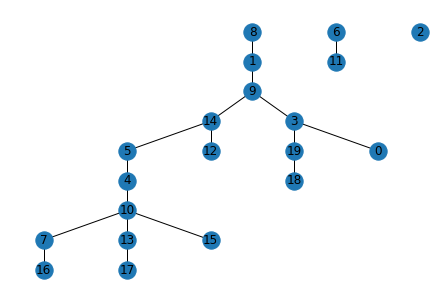

In [53]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
import random

def generate_random_tree(n):
    nodes = list(range(n))
    random.shuffle(nodes)
    tree = nx.DiGraph()
    tree.add_nodes_from(nodes)
    levels = [[nodes.pop() for _ in range(min(len(nodes), random.randint(1, 4)))] for _ in range(n)]
    for i in range(1, len(levels)):
        for node in levels[i]:
            tree.add_edge(random.choice(levels[i-1]), node)
    return tree

def draw_graph(graph):
    pos = nx.drawing.nx_pydot.graphviz_layout(graph, prog='dot')
    nx.draw(graph, pos, with_labels=True, arrows=False)
    plt.show()


n = 20  # specify the number of nodes you want
tree = generate_random_tree(n)
draw_graph(tree)


In [25]:
nx.draw_network??

Object `nx.draw_network` not found.


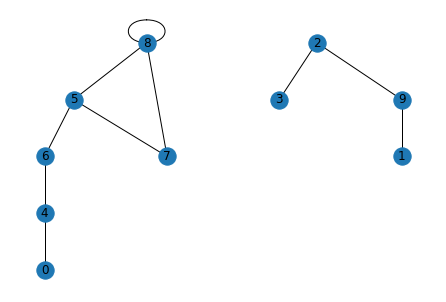

Distances from the root (8): [ 4. inf inf inf  3.  1.  2.  2.  0. inf]


In [37]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
import random

def generate_random_tree(n):
    nodes = list(range(n))
    random.shuffle(nodes)
    root = nodes.pop()
    tree = nx.DiGraph()
    tree.add_node(root)
    levels = [[root] + [nodes.pop() for _ in range(min(len(nodes), random.randint(1, 4)))] for _ in range(n)]
    for i in range(1, len(levels)):
        for node in levels[i]:
            tree.add_edge(random.choice(levels[i-1]), node)
    return tree, root

def draw_graph(graph):
    pos = nx.drawing.nx_pydot.graphviz_layout(graph, prog='dot')
    nx.draw(graph, pos, with_labels=True, arrows=False)
    plt.show()

def compute_distances(tree, root):
    distances = np.full(len(tree.nodes), np.inf)
    distances[root] = 0
    queue = [(root, 0)]
    while queue:
        node, dist = queue.pop(0)
        for neighbor in tree.neighbors(node):
            if distances[neighbor] == np.inf:
                distances[neighbor] = dist + 1
                queue.append((neighbor, dist + 1))
    return distances

n = 10  # specify the number of nodes you want
tree, root = generate_random_tree(n)
draw_graph(tree)
distances = compute_distances(tree, root)
print(f"Distances from the root ({root}): {distances}")


In [4]:
import networkx as nx